In [149]:
import numpy as np



In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc


In [151]:
data = pd.read_csv("car data.csv")

In [152]:
data.head()



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#Data Inspection and Cleaning


In [154]:
#Checking for null values within the data
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

<BarContainer object of 3 artists>

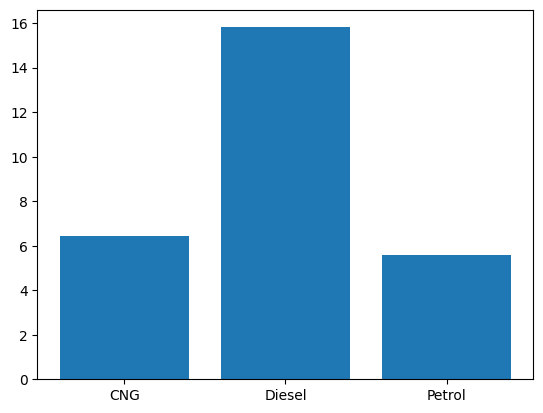

In [155]:
fuel_type = data.groupby('Fuel_Type')['Present_Price'].mean()

plt.bar(fuel_type.keys(), fuel_type.values)

In [156]:
data.drop('Car_Name', inplace=True, axis=1)

In [157]:
data.Transmission.unique(
)

array(['Manual', 'Automatic'], dtype=object)

In [158]:
Selling_Type_map = {
    'Dealer': 1,
    'Individual': 0
}

data.Selling_type = data.Selling_type.map(Selling_Type_map)

In [159]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
data.Fuel_Type = enc.fit_transform(data.Fuel_Type)




In [160]:
data.Transmission = enc.fit_transform(data.Transmission)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Selling_type   301 non-null    int64  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 16.6 KB


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X = data.drop('Present_Price', axis=1).values


In [164]:
y= data.Present_Price.values



In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=143)

In [166]:
from sklearn.linear_model import Ridge

In [167]:
alphas = [0.01, 0.025, 0.05, 0.07, 0.001]
ridge_scores =[]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)

[0.7439834076456151, 0.7439750729869087, 0.7439612273105934, 0.7439501912337282, 0.7439884183351948]


In [168]:
ridge = Ridge(alpha=0.001)

ridge.fit(X_train, y_train)
pred= ridge.predict(X_test)

In [169]:
from sklearn.metrics import r2_score
test_score = r2_score(y_test, pred)

print("Model Test Score:", round(score*100,2))

Model Test Score: 74.4


In [170]:
print(ridge.score(X_test, y_test))

0.7439884183351948
